In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [ ]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

* Train/test dataset 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size = 0.1, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

* 모델 정의/설정/학습

In [ ]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 8)                 168       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128)

Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 71.5698 - val_loss: 13.6971
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 10.2699 - val_loss: 5.4274
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 4.4957 - val_loss: 3.5198
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 2.7806 - val_loss: 2.1519
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8747 - val_loss: 1.5339
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 1.5749 - val_loss: 3.4815
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 1.4393 - val_loss: 1.3931
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 1.3062 - val_loss: 3.0561
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 1.0243 - val_loss: 0.8788
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.8969 - val

* 학습과정 시각화

In [16]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

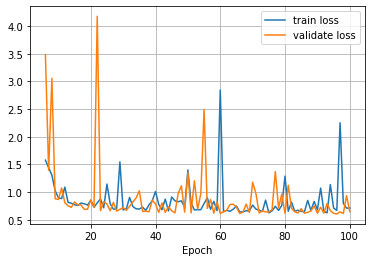

In [17]:
import matplotlib.pyplot as plt
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validate loss')
plt.legend()
plt.grid()
plt.ylim([0,10])
plt.xlabel('Epoch')
plt.show()

### Case 2) 모델 재정의 , 콜백 함수 사용

In [18]:
model2 = Sequential([
    Dense(10, input_dim=8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 16)                176       
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer='rmsprop', loss='mean_squared_error')


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = 'california_house2.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=30)

In [21]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2, 
                   epochs=1000, batch_size=128, verbose=0, 
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 40.05322, saving model to california_house2.h5

Epoch 00002: val_loss improved from 40.05322 to 1.90148, saving model to california_house2.h5

Epoch 00003: val_loss did not improve from 1.90148

Epoch 00004: val_loss did not improve from 1.90148

Epoch 00005: val_loss did not improve from 1.90148

Epoch 00006: val_loss improved from 1.90148 to 1.53457, saving model to california_house2.h5

Epoch 00007: val_loss did not improve from 1.53457

Epoch 00008: val_loss did not improve from 1.53457

Epoch 00009: val_loss did not improve from 1.53457

Epoch 00010: val_loss improved from 1.53457 to 1.22653, saving model to california_house2.h5

Epoch 00011: val_loss did not improve from 1.22653

Epoch 00012: val_loss improved from 1.22653 to 1.10182, saving model to california_house2.h5

Epoch 00013: val_loss did not improve from 1.10182

Epoch 00014: val_loss did not improve from 1.10182

Epoch 00015: val_loss did not improve from 1.10182

Epoch 00016

In [22]:
y_loss = hist2.history['loss']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

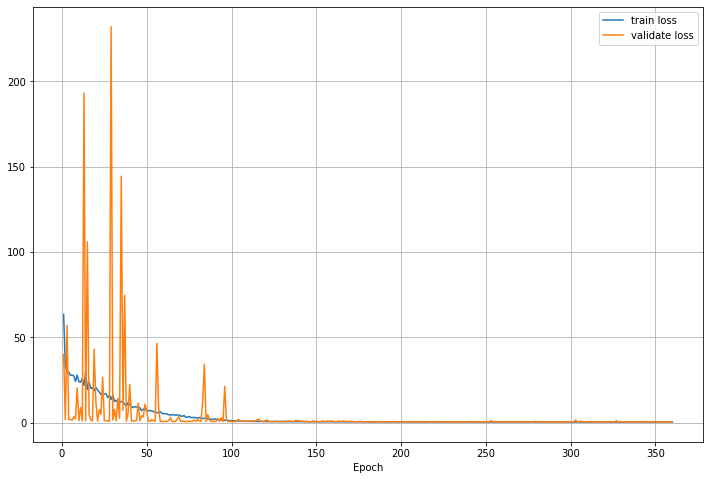

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validate loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

* 평가

In [26]:
pred = model.predict(X_test)
pred2 = model2.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(0.6517109411043888, 0.4922078555814571)

In [28]:
mean_squared_error(y_test, pred2), r2_score(y_test, pred2)

(0.6117657610307092, 0.5233318514659294)

- 예측치 비교

In [29]:
df = pd.DataFrame({
    'y_test':y_test, 'pred':pred.flatten(),'pred2':pred2.flatten()
})
df.head(10)

,y_test,pred,pred2
0,4.771,4.712087,3.703414
1,1.371,1.962627,1.008881
2,1.233,2.337717,1.447862
3,0.938,1.878070,0.867055
4,3.260,3.216815,3.042714
5,1.516,1.994421,1.200109
6,2.738,2.574621,1.975258
7,1.368,2.178930,1.367799
8,1.175,1.335338,0.973762
9,2.966,2.968660,2.505919
